In [2]:
import numpy as np
import pandas as pd
%matplotlib inline 


In [3]:
import statsmodels.api as sm

In [4]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge, RidgeCV,Lasso, LassoCV, ElasticNet,ElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option('display.max_columns', None) # displays all pd columns

In [6]:
housing = pd.read_csv('../../Ames_HousePrice.csv', index_col=0)

In [7]:
real_estate = pd.read_csv('../../Ames Real Estate Data.csv', index_col=0)

In [8]:
price = housing["SalePrice"]

In [9]:
int_df = housing.select_dtypes(include='int64')
int_df

,PID,GrLivArea,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,909176150,856,126000,30,7890,6,6,1939,1950,856,0,0,1,0,2,1,4,1,0,0,0,0,166,0,0,3,2010
2,905476230,1049,139500,120,4235,5,5,1984,1984,1049,0,0,2,0,2,1,5,0,0,105,0,0,0,0,0,2,2009
3,911128020,1001,124900,30,6060,5,9,1930,2007,1001,0,0,1,0,2,1,5,0,154,0,42,86,0,0,0,11,2007
4,535377150,1039,114000,70,8146,4,8,1900,2003,717,322,0,1,0,2,1,6,0,0,0,168,0,111,0,0,5,2009
5,534177230,1665,227000,60,8400,8,6,2001,2001,810,855,0,2,1,3,1,6,0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,8854,6,6,1916,1950,952,0,0,1,0,2,1,4,1,0,98,0,0,40,0,0,5,2009
760,905402060,1733,139600,20,13680,3,5,1955,1955,1733,0,0,2,0,4,1,8,1,0,0,0,0,0,0,0,6,2009
761,909275030,2002,145000,90,6270,5,6,1949,1950,1001,1001,0,2,0,4,2,8,0,0,0,0,0,0,0,0,8,2007
762,907192040,1842,217500,60,8826,7,5,2000,2000,985,857,0,2,1,3,1,7,1,193,96,0,0,0,0,0,7,2007


In [10]:
int_df.isnull().sum().sort_values(axis=0, ascending=False)

PID              0
BedroomAbvGr     0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
HalfBath         0
GrLivArea        0
FullBath         0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
MSSubClass       0
SalePrice        0
YrSold           0
dtype: int64

In [11]:
x = sm.add_constant(int_df)
model = sm.OLS(np.log(price), x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1546.
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        14:44:14   Log-Likelihood:                 2422.4
No. Observations:                2580   AIC:                            -4791.
Df Residuals:                    2553   BIC:                            -4633.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.1540      2.921      3.477

In [12]:
rm_pvalues = results.pvalues[results.pvalues > 0.05]
rm_pvalues

PID             0.313170
MSSubClass      0.068097
2ndFlrSF        0.727850
LowQualFinSF    0.855165
HalfBath        0.339207
TotRmsAbvGrd    0.445227
WoodDeckSF      0.291387
OpenPorchSF     0.506901
3SsnPorch       0.099312
PoolArea        0.669934
MiscVal         0.770867
MoSold          0.837923
YrSold          0.103881
dtype: float64

In [13]:
int_df.drop(columns=rm_pvalues.index, inplace=True)

In [14]:
int_df

,GrLivArea,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,EnclosedPorch,ScreenPorch
1,856,126000,7890,6,6,1939,1950,856,1,2,1,1,0,166
2,1049,139500,4235,5,5,1984,1984,1049,2,2,1,0,0,0
3,1001,124900,6060,5,9,1930,2007,1001,1,2,1,0,42,0
4,1039,114000,8146,4,8,1900,2003,717,1,2,1,0,168,111
5,1665,227000,8400,8,6,2001,2001,810,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,121000,8854,6,6,1916,1950,952,1,2,1,1,0,40
760,1733,139600,13680,3,5,1955,1955,1733,2,4,1,1,0,0
761,2002,145000,6270,5,6,1949,1950,1001,2,4,2,0,0,0
762,1842,217500,8826,7,5,2000,2000,985,2,3,1,1,0,0


In [15]:
# int_df.SalePrice = np.log1p(int_df.SalePrice)
# y = int_df.SalePrice

In [16]:
y = int_df.SalePrice

In [17]:
int_df.drop(columns='SalePrice', inplace=True)
int_df

,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,EnclosedPorch,ScreenPorch
1,856,7890,6,6,1939,1950,856,1,2,1,1,0,166
2,1049,4235,5,5,1984,1984,1049,2,2,1,0,0,0
3,1001,6060,5,9,1930,2007,1001,1,2,1,0,42,0
4,1039,8146,4,8,1900,2003,717,1,2,1,0,168,111
5,1665,8400,8,6,2001,2001,810,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,8854,6,6,1916,1950,952,1,2,1,1,0,40
760,1733,13680,3,5,1955,1955,1733,2,4,1,1,0,0
761,2002,6270,5,6,1949,1950,1001,2,4,2,0,0,0
762,1842,8826,7,5,2000,2000,985,2,3,1,1,0,0


In [18]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(int_df, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1806, 13)
X_test : (774, 13)
y_train : (1806,)
y_test : (774,)


In [80]:
#pull in group's train-test split
X_train = pd.read_csv('../../group train-test split/X_train42.csv')
X_test = pd.read_csv('../../group train-test split/X_test42.csv')
y_train = pd.read_csv('../../group train-test split/y_train42.csv')
y_test = pd.read_csv('../../group train-test split/y_test42.csv')

# ValueError: at least one array or dtype is required.

In [81]:
X_train.isnull().sum().sort_values(axis=0, ascending=False)

GrLivArea                 0
Exterior2nd__Wd Sdng      0
MasVnrType__BrkCmn        0
MasVnrType__BrkFace       0
MasVnrType__NA            0
                         ..
Neighborhood__Sawyer      0
Neighborhood__SawyerW     0
Neighborhood__Somerst     0
Neighborhood__StoneBr     0
SaleCondition__Partial    0
Length: 230, dtype: int64

In [82]:
X_train

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MoSold,Remodeled,BsmtfinSF,MSSubClass__30,MSSubClass__40,MSSubClass__45,MSSubClass__50,MSSubClass__60,MSSubClass__70,MSSubClass__75,MSSubClass__80,MSSubClass__85,MSSubClass__90,MSSubClass__120,MSSubClass__160,MSSubClass__180,MSSubClass__190,MSZoning__A (agr),MSZoning__C (all),MSZoning__FV,MSZoning__I (all),MSZoning__RH,MSZoning__RM,LotShape__IR1,LotShape__IR2,LotShape__IR3,LandContour__Bnk,LandContour__HLS,LandContour__Low,LotConfig__Corner,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,LandSlope__Mod,LandSlope__Sev,Neighborhood__Blmngtn,Neighborhood__Blueste,Neighborhood__BrDale,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__Greens,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__Mitchel,Neighborhood__NPkVill,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__StoneBr,Neighborhood__Timber,Neighborhood__Veenker,Condition1__Artery,Condition1__Feedr,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,Condition2__Artery,Condition2__Feedr,Condition2__PosA,Condition2__PosN,Condition2__RRAe,Condition2__RRAn,Condition2__RRNn,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,HouseStyle__1.5Fin,HouseStyle__1.5Unf,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,RoofStyle__Flat,RoofStyle__Gambrel,RoofStyle__Hip,RoofStyle__Mansard,RoofStyle__Shed,Exterior1st__AsbShng,Exterior1st__AsphShn,Exterior1st__BrkComm,Exterior1st__BrkFace,Exterior1st__CBlock,Exterior1st__CemntBd,Exterior1st__HdBoard,Exterior1st__ImStucc,Exterior1st__MetalSd,Exterior1st__Plywood,Exterior1st__PreCast,Exterior1st__Stucco,Exterior1st__Wd Sdng,Exterior1st__WdShing,Exterior2nd__AsbShng,Exterior2nd__AsphShn,Exterior2nd__Brk Cmn,Exterior2nd__BrkFace,Exterior2nd__CBlock,Exterior2nd__CmentBd,Exterior2nd__HdBoard,Exterior2nd__ImStucc,Exterior2nd__MetalSd,Exterior2nd__Plywood,Exterior2nd__PreCast,Exterior2nd__Stone,Exterior2nd__Stucco,Exterior2nd__Wd Sdng,Exterior2nd__Wd Shng,MasVnrType__BrkCmn,MasVnrType__BrkFace,MasVnrType__NA,MasVnrType__Stone,ExterQual__Ex,ExterQual__Fa,ExterQual__Gd,ExterCond__Ex,ExterCond__Fa,ExterCond__Gd,ExterCond__Po,Foundation__BrkTil,Foundation__PConc,Foundation__Slab,Foundation__Stone,Foundation__Wood,BsmtQual__Ex,BsmtQual__Fa,BsmtQual__Gd,BsmtQual__NA,BsmtQual__Po,BsmtCond__Ex,BsmtCond__Fa,BsmtCond__Gd,BsmtCond__NA,BsmtCond__Po,BsmtExposure__Av,BsmtExposure__Gd,BsmtExposure__Mn,BsmtExposure__NA,HeatingQC__Fa,HeatingQC__Gd,HeatingQC__Po,HeatingQC__TA,Electrical__FuseA,Electrical__FuseF,Electrical__FuseP,Electrical__NA,KitchenQual__Ex,KitchenQual__Fa,KitchenQual__Gd,KitchenQual__Po,Functional__Maj1,Functional__Maj2,Functional__Min1,Functional__Min2,Functional__Mod,Functional__Sal,GarageType__2Types,GarageType__Basment,GarageType__BuiltIn,GarageType__CarPort,GarageType__Detchd,GarageType__NA,GarageQual__Ex,GarageQual__Fa,GarageQual__Gd,GarageQual__NA,GarageQual__Po,GarageCond__Ex,GarageCond__Fa,GarageCond__Gd,GarageCond__NA,GarageCond__Po,PavedDrive__N,PavedDrive__P,YrSold__2006,YrSold__2008,YrSold__2009,YrSold__2010,SaleType__COD,SaleType__CWD,SaleType__Con,SaleType__ConLD,SaleType__ConLI,SaleType__ConLw,SaleType__New,SaleType__Oth,SaleType__VWD,SaleCondition__Abnorml,SaleCondition__AdjLand,SaleCondition__Alloca,SaleCondition__Family,SaleCondition__Partial
0,1216,80.0,8480,5,5,1947,0.0,390.0,1,832,384,0.0,0.0,1,0,2,1,6,0,1.0,158,0,102,0,0,0,10,1,442.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [83]:
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (2046, 230)
X_test : (512, 230)
y_train : (2046, 1)
y_test : (512, 1)


In [84]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

Best alpha : 6.0
Try again for more precision with alphas centered around 6.0
Best alpha : 6.8999999999999995
Ridge RMSE on Training set : 21999.81635240984
Ridge RMSE on Test set : 24437.300398058313


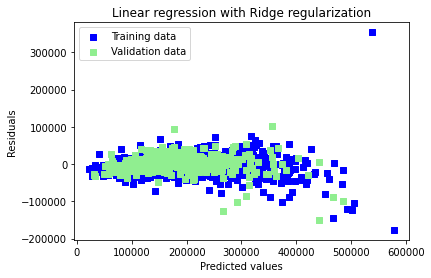

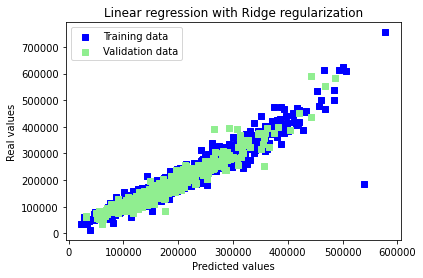

ValueError: Length of values (1) does not match length of index (230)

In [85]:
# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
#plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

In [168]:
# Define models
model_lin = LinearRegression()
model_ridge = Ridge(alpha = 1)
model_lasso = Lasso(alpha = 0.001)
#model_tree = DecisionTreeRegressor()
#model_ran = RandomForestRegressor()
#model_xg = XGBRegressor()

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

# Define a function for each metric
# R²
def rsqr_score(test, pred):
    """Calculate R squared score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score 
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred, model):
    """Print calculated score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """
    
    print(f"- Regressor: {model}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [169]:
scores_ridge = cross_val_score(model_ridge, X_train, y_train,
                                cv=5)

print("Mean scores (Ridge Model):\n", np.mean(scores_ridge))
print("Standard deviation of scores (Ridge Model):\n", np.std(scores_ridge))

Mean scores (Ridge Model):
 0.9068443693151995
Standard deviation of scores (Ridge Model):
 0.033970482044912306


In [170]:
scores_ridge_mse = -1 * cross_val_score(model_ridge, X_train, y_train,
                                      cv=5,
                                      scoring='neg_mean_squared_error')

print("MSE scores (Ridge Model):\n", scores_ridge_mse)
print("Mean MSE scores:", scores_ridge_mse.mean())

MSE scores (Ridge Model):
 [9.98841265e+08 4.03773279e+08 4.27012409e+08 3.76475137e+08
 4.69027557e+08]
Mean MSE scores: 535025929.16027564


In [171]:
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
print_score(y_test, y_pred_ridge, "Ridge")

- Regressor: Ridge
R²: 0.9211488682057701
RMSE: 21116.276635668877



In [172]:
model_ridge.fit(X_train, np.log(y_train))
logy_pred_ridge = model_ridge.predict(X_test)
print_score(y_test, np.exp(logy_pred_ridge), "Log Ridge Inputs")

- Regressor: Log Ridge Inputs
R²: 0.9351478059080912
RMSE: 19150.30583251604



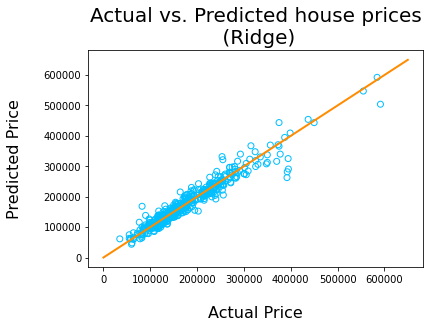

In [173]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Ridge)", fontsize=20)
plt.scatter(y_test, np.exp(logy_pred_ridge),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 650000], [0, 650000], "darkorange", lw=2)
#plt.xlim(0, 800000)
#plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

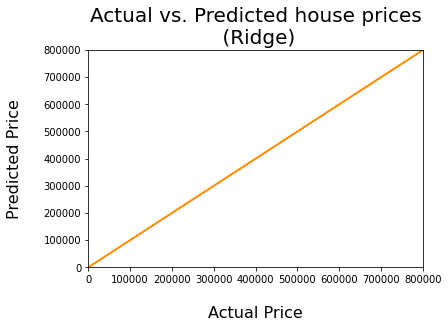

In [93]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Ridge)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_ridge),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()